<a href="https://colab.research.google.com/github/Kaiizx/AppleGrading/blob/main/Apple_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --no-cache-dir gdown -q

In [ ]:
!gdown https://drive.google.com/drive/folders/1ZH_0V-u051rrfl4Op0yBSP7GG8Hpj-q1 -O /content --folder

Retrieving folder contents
Processing file 10EPpRXoLGlgBiGwKPpjjkdeXNfTXKHu_ apple_gb.pkl
Processing file 1-ndmhTN4KXY1kLMFdO70LZBnKDQD_Sw1 apple_quality.csv
Processing file 10Muakx46ImDs2HVhBtjHPrvHhXFukvOz apple_rf.pkl
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=10EPpRXoLGlgBiGwKPpjjkdeXNfTXKHu_
To: /content/apple_gb.pkl
100% 1.55M/1.55M [00:00<00:00, 137MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-ndmhTN4KXY1kLMFdO70LZBnKDQD_Sw1
To: /content/apple_quality.csv
100% 388k/388k [00:00<00:00, 67.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=10Muakx46ImDs2HVhBtjHPrvHhXFukvOz
To: /content/apple_rf.pkl
100% 2.63M/2.63M [00:00<00:00, 49.5MB/s]
Download completed


## Prepare data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader as web
from sklearn import model_selection
from scipy import stats
from sklearn import datasets
import sklearn.metrics
# from autosklearn import classification

pd.options.display.float_format = '{:.3f}'.format

In [ ]:
### START CODE HERE ###
df = pd.read_csv('/content/apple_quality.csv')
### END CODE HERE ###

In [ ]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.000,-3.970,-2.512,5.346,-1.012,1.845,0.330,-0.491590483,good
1,1.000,-1.195,-2.839,3.664,1.588,0.853,0.868,-0.722809367,good
2,2.000,-0.292,-1.351,-1.738,-0.343,2.839,-0.038,2.621636473,bad
3,3.000,-0.657,-2.272,1.325,-0.098,3.638,-3.414,0.790723217,good
4,4.000,1.364,-1.297,-0.385,-0.553,3.031,-1.304,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.000,-0.293,1.949,-0.204,-0.640,0.025,-1.088,1.854235285,good
3997,3997.000,-2.635,-2.138,-2.440,0.657,2.200,4.764,-1.334611391,bad
3998,3998.000,-4.008,-1.779,2.366,-0.200,2.161,0.214,-2.229719806,good
3999,3999.000,0.279,-1.716,0.121,-1.154,1.267,-0.777,1.599796456,good


In [ ]:
df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [ ]:
df_cleaned = df.dropna()
df_cleaned

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.000,-3.970,-2.512,5.346,-1.012,1.845,0.330,-0.491590483,good
1,1.000,-1.195,-2.839,3.664,1.588,0.853,0.868,-0.722809367,good
2,2.000,-0.292,-1.351,-1.738,-0.343,2.839,-0.038,2.621636473,bad
3,3.000,-0.657,-2.272,1.325,-0.098,3.638,-3.414,0.790723217,good
4,4.000,1.364,-1.297,-0.385,-0.553,3.031,-1.304,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.000,0.059,-1.067,-3.715,0.473,1.698,2.244,0.137784369,bad
3996,3996.000,-0.293,1.949,-0.204,-0.640,0.025,-1.088,1.854235285,good
3997,3997.000,-2.635,-2.138,-2.440,0.657,2.200,4.764,-1.334611391,bad
3998,3998.000,-4.008,-1.779,2.366,-0.200,2.161,0.214,-2.229719806,good


In [ ]:
X = df_cleaned.drop(["Quality","A_id"],axis=1)
Y = pd.DataFrame(df_cleaned["Quality"])

In [ ]:
X

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970,-2.512,5.346,-1.012,1.845,0.330,-0.491590483
1,-1.195,-2.839,3.664,1.588,0.853,0.868,-0.722809367
2,-0.292,-1.351,-1.738,-0.343,2.839,-0.038,2.621636473
3,-0.657,-2.272,1.325,-0.098,3.638,-3.414,0.790723217
4,1.364,-1.297,-0.385,-0.553,3.031,-1.304,0.501984036
...,...,...,...,...,...,...,...
3995,0.059,-1.067,-3.715,0.473,1.698,2.244,0.137784369
3996,-0.293,1.949,-0.204,-0.640,0.025,-1.088,1.854235285
3997,-2.635,-2.138,-2.440,0.657,2.200,4.764,-1.334611391
3998,-4.008,-1.779,2.366,-0.200,2.161,0.214,-2.229719806


In [ ]:
X['Acidity'] = X['Acidity'].astype('float64')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
dtypes: float64(7)
memory usage: 250.0 KB


In [ ]:
X.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000
mean,-0.503,-0.990,-0.470,0.985,0.512,0.498,0.077
std,1.928,1.603,1.943,1.403,1.930,1.874,2.110
min,-7.152,-7.150,-6.894,-6.055,-5.962,-5.865,-7.011
25%,-1.817,-2.012,-1.738,0.063,-0.801,-0.772,-1.377
50%,-0.514,-0.985,-0.505,0.998,0.534,0.503,0.023
75%,0.806,0.031,0.802,1.894,1.836,1.766,1.510
max,6.406,5.791,6.375,7.620,7.364,7.238,7.405


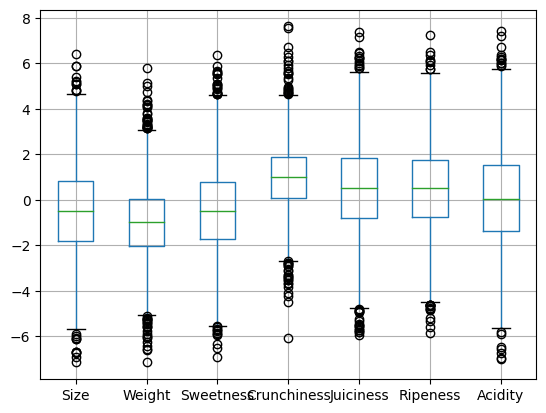

In [ ]:
X.boxplot()
plt.show()

In [ ]:
filter_data=X.iloc[:,[0,1,2,3,4,5,6]]
filter_data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970,-2.512,5.346,-1.012,1.845,0.330,-0.491590483
1,-1.195,-2.839,3.664,1.588,0.853,0.868,-0.722809367
2,-0.292,-1.351,-1.738,-0.343,2.839,-0.038,2.621636473
3,-0.657,-2.272,1.325,-0.098,3.638,-3.414,0.790723217
4,1.364,-1.297,-0.385,-0.553,3.031,-1.304,0.501984036


In [ ]:
filter_data = filter_data.apply(pd.to_numeric, errors='coerce')

for column in filter_data.columns:
    Q1 = filter_data[column].quantile(0.25)
    Q3 = filter_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = filter_data[column].mean()
    X[column] = filter_data[(filter_data[column] >= lower_bound) & (filter_data[column] <= upper_bound)][column]
    X[column].fillna(mean_value, inplace=True)

In [ ]:
X

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970,-2.512,-0.470,-1.012,1.845,0.330,-0.492
1,-1.195,-2.839,3.664,1.588,0.853,0.868,-0.723
2,-0.292,-1.351,-1.738,-0.343,2.839,-0.038,2.622
3,-0.657,-2.272,1.325,-0.098,3.638,-3.414,0.791
4,1.364,-1.297,-0.385,-0.553,3.031,-1.304,0.502
...,...,...,...,...,...,...,...
3995,0.059,-1.067,-3.715,0.473,1.698,2.244,0.138
3996,-0.293,1.949,-0.204,-0.640,0.025,-1.088,1.854
3997,-2.635,-2.138,-2.440,0.657,2.200,4.764,-1.335
3998,-4.008,-1.779,2.366,-0.200,2.161,0.214,-2.230


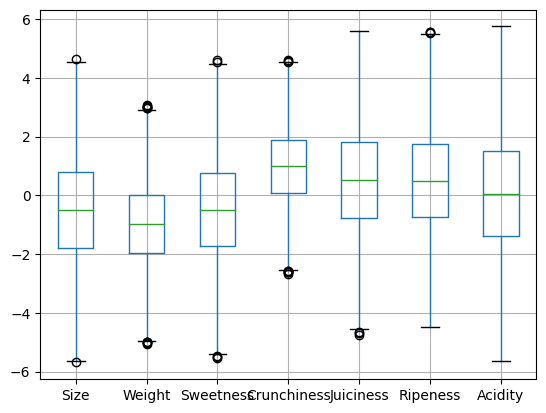

In [ ]:
X.boxplot()
plt.show()

In [ ]:
Y

,Quality
0,good
1,good
2,bad
3,good
4,good
...,...
3995,bad
3996,good
3997,bad
3998,good


In [ ]:
Y.describe()

,Quality
count,4000
unique,2
top,good
freq,2004


Text(0.5, 1.0, 'good , bad bar')

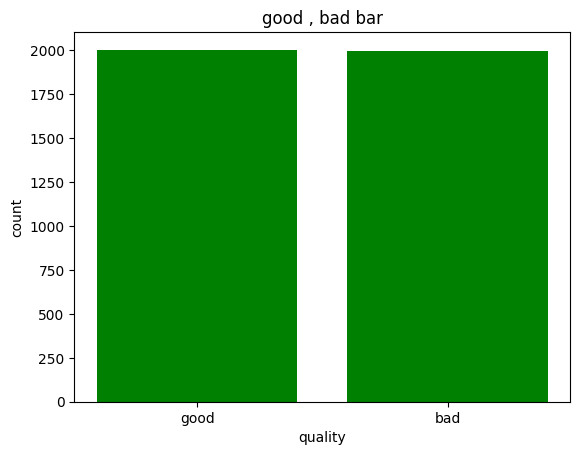

In [ ]:
# Create a bar plot
compare=Y["Quality"].value_counts()
plt.bar(compare.index, compare, color='green')

# Add labels and title
plt.xlabel('quality')
plt.ylabel('count')
plt.title('good , bad bar')

In [ ]:
mapping = {'good': 1, 'bad': 0}
Y["Quality_num"] = Y["Quality"].map(mapping)
Y['Quality'] = Y['Quality_num']
Y = Y.drop('Quality_num',axis=1)

In [ ]:
# Initialize the StandardScaler
scaler = preprocessing.StandardScaler()

# Fit the scaler to the data and transform the data
data_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame (optional)
data_scaled_df = pd.DataFrame(data_scaled, columns=X.columns)

In [ ]:
data_scaled_df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000
mean,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.764,-2.704,-2.698,-2.798,-2.839,-2.728,-2.767
25%,-0.690,-0.653,-0.660,-0.679,-0.695,-0.689,-0.698
50%,-0.000,0.007,-0.006,0.002,-0.002,-0.004,-0.019
75%,0.684,0.664,0.670,0.677,0.696,0.681,0.693
max,2.745,2.719,2.712,2.754,2.734,2.767,2.755


In [ ]:
X = data_scaled_df

In [ ]:
X.corr()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Size,1.000,-0.140,-0.313,0.166,-0.023,-0.140,0.192
Weight,-0.140,1.000,-0.121,-0.087,-0.090,-0.222,0.039
Sweetness,-0.313,-0.121,1.000,-0.014,0.089,-0.258,0.072
Crunchiness,0.166,-0.087,-0.014,1.000,-0.228,-0.182,0.078
Juiciness,-0.023,-0.090,0.089,-0.228,1.000,-0.108,0.234
Ripeness,-0.140,-0.222,-0.258,-0.182,-0.108,1.000,-0.188
Acidity,0.192,0.039,0.072,0.078,0.234,-0.188,1.000


In [ ]:
correlation_matrix = X.corr()
X_columns = X.columns
to_drop = []
for c1 in X_columns:
    for c2 in X_columns:
        if c1 != c2 and c1 not in to_drop and correlation_matrix[c1][c2] > 0.8:
            to_drop.append(c1)

X.drop(columns=to_drop, inplace=True)

In [ ]:
print(to_drop)

[]


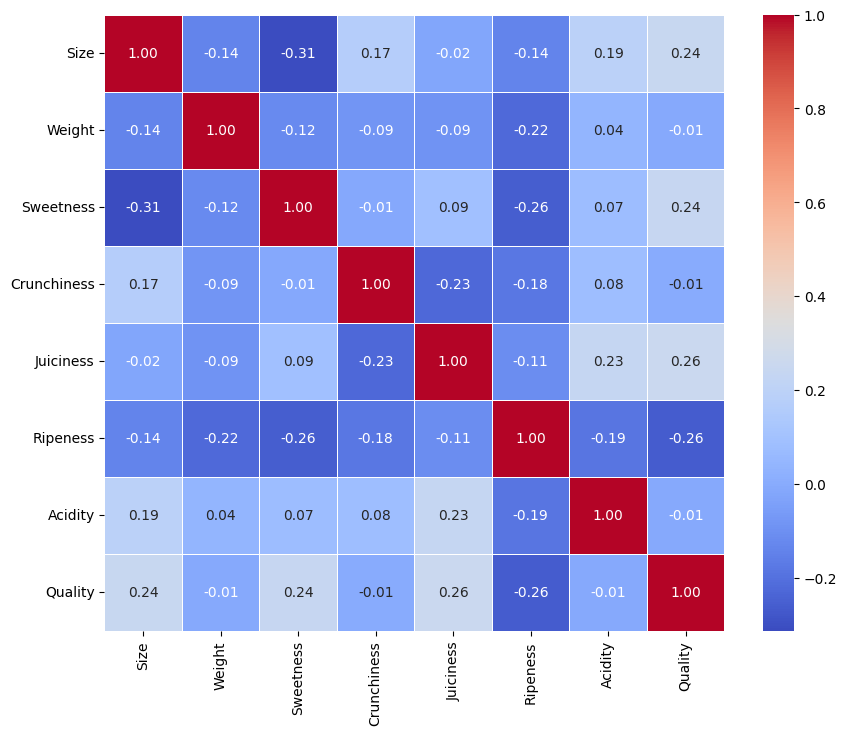

In [ ]:
data = pd.concat([X, Y], axis=1)
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
X_train

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
3012,-0.983,-0.330,0.181,-0.814,-1.195,1.530,-0.084
1436,0.059,-0.707,-0.540,-0.257,1.045,1.103,-0.505
96,-0.061,-0.754,-0.583,-0.899,1.673,1.509,-0.826
43,0.698,1.167,0.354,0.357,-1.147,-1.799,0.057
1814,-0.606,1.662,-0.963,-0.108,-0.498,0.931,1.017
...,...,...,...,...,...,...,...
1130,0.909,-0.591,-1.101,0.074,1.604,-0.511,1.388
1294,-0.637,-0.528,-0.452,-0.669,0.036,0.984,-1.419
860,1.580,-0.449,0.114,-0.796,-1.015,2.185,0.554
3507,-0.627,-0.117,1.116,-0.008,-0.086,-0.006,-0.398


In [ ]:
X_test

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
555,1.919,-0.461,-1.702,-0.015,0.011,0.633,-0.297
3491,1.035,0.517,0.226,0.328,0.198,-1.479,0.914
527,0.911,0.327,1.183,0.242,-0.578,-1.007,0.457
3925,-0.591,-0.370,1.457,-0.869,-1.052,1.032,-0.269
2989,-0.778,0.328,-1.014,-0.646,-1.775,0.613,-0.827
...,...,...,...,...,...,...,...
2778,1.347,0.523,0.300,0.630,-1.009,-0.626,0.826
790,-0.076,-1.043,-0.602,-0.501,1.273,0.748,2.066
1334,0.136,0.742,-0.330,-0.960,1.083,-1.064,0.664
678,0.228,1.788,-1.430,0.694,-0.271,0.732,-1.280


In [ ]:
y_train

,Quality
3012,0
1436,0
96,0
43,0
1814,0
...,...
1130,1
1294,0
860,1
3507,1


In [ ]:
y_test

,Quality
555,1
3491,0
527,0
3925,1
2989,0
...,...
2778,0
790,0
1334,0
678,0


## Autogluon

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel

# Install the proper version of PyTorch following https://pytorch.org/get-started/locally/
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 --index-url https://download.pytorch.org/whl/cu118

!pip install autogluon

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
data = pd.concat([X, Y], axis=1)
data

In [ ]:
train_data, test_data = model_selection.train_test_split(data,test_size=0.2, random_state=42)
train_data

In [ ]:
predictor = TabularPredictor(label='Quality',eval_metric='accuracy').fit(train_data)
predictor

In [ ]:
predictor.evaluate(test_data, silent=True)

In [ ]:
predictor.leaderboard(test_data)

## Hyper parameter tunning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### RandomForest

In [ ]:

random_forest_model = RandomForestClassifier()
random_forest_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

cv=StratifiedKFold(n_splits=6, shuffle=True, random_state = 42)


random_forest_grid_search = GridSearchCV(random_forest_model, random_forest_param_grid, cv=cv, scoring='accuracy',verbose=3)
random_forest_grid_result = random_forest_grid_search.fit(X_train, y_train)


print("Best parameters for Random Forest: ", random_forest_grid_result.best_params_)
print("Best cross-validation accuracy for Random Forest: {:.2f}".format(random_forest_grid_result.best_score_))

best_random_forest_model = random_forest_grid_result.best_estimator_



Fitting 6 folds for each of 81 candidates, totalling 486 fits
[CV 1/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.856 total time=   0.3s
[CV 2/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.862 total time=   0.3s
[CV 3/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.860 total time=   0.3s
[CV 4/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.864 total time=   0.3s
[CV 5/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.846 total time=   0.3s
[CV 6/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.866 total time=   0.3s
[CV 1/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.844 total time=   0.6s
[CV 2/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.874 tot

In [ ]:
cv_results = pd.DataFrame(random_forest_grid_result.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.306,0.008,0.013,0.001,None,1,2,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.856,0.862,0.860,0.864,0.846,0.866,0.859,0.007,7
1,0.607,0.006,0.019,0.000,None,1,2,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.844,0.874,0.874,0.862,0.844,0.870,0.861,0.013,2
2,1.325,0.187,0.037,0.006,None,1,2,200,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.852,0.872,0.868,0.864,0.838,0.862,0.859,0.011,5
3,0.304,0.002,0.012,0.001,None,1,5,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.842,0.860,0.870,0.850,0.830,0.858,0.852,0.013,49
4,0.642,0.085,0.020,0.002,None,1,5,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.852,0.852,0.864,0.846,0.836,0.872,0.854,0.012,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.682,0.104,0.021,0.002,20,4,5,100,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.850,0.858,0.856,0.862,0.828,0.862,0.853,0.012,41
77,1.117,0.016,0.031,0.001,20,4,5,200,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.858,0.864,0.866,0.856,0.830,0.860,0.856,0.012,20
78,0.284,0.007,0.012,0.000,20,4,10,50,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.848,0.854,0.862,0.842,0.824,0.868,0.850,0.014,60
79,0.680,0.117,0.023,0.004,20,4,10,100,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.848,0.858,0.862,0.852,0.828,0.862,0.852,0.012,46


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate on the test set
random_forest_predictions = random_forest_grid_result.predict(X_test)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, random_forest_predictions))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, random_forest_predictions))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       495
           1       0.89      0.87      0.88       505

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000


Random Forest Confusion Matrix:
 [[439  56]
 [ 64 441]]


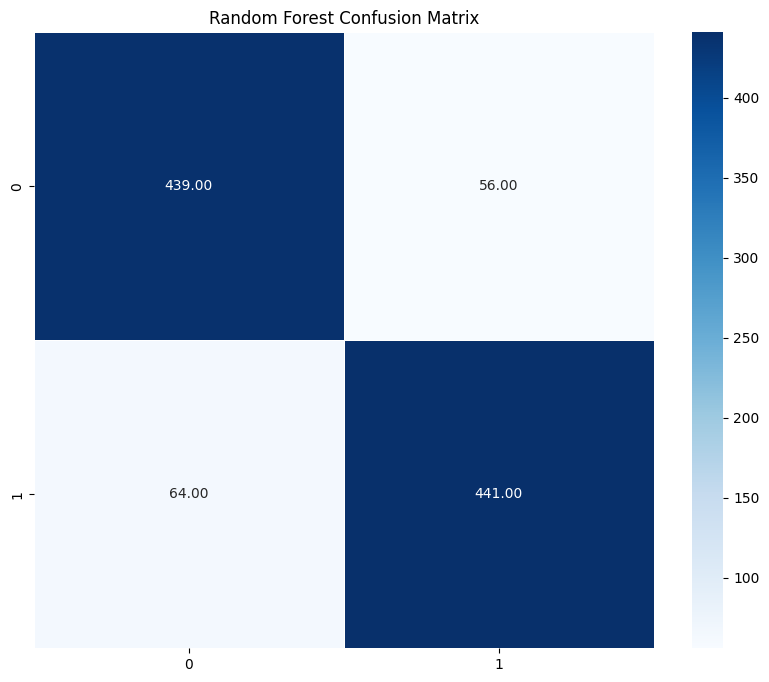

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Random Forest Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, random_forest_predictions), annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.show()

### GradientBoosting

In [ ]:
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

cv=StratifiedKFold(n_splits=6, shuffle=True, random_state = 42)

gradient_boosting_grid_search = GridSearchCV(gradient_boosting_model, gradient_boosting_param_grid, cv=cv, scoring='accuracy',verbose=3)
gradient_boosting_grid_result = gradient_boosting_grid_search.fit(X_train, y_train)

print("Best parameters for Gradient Boosting: ", gradient_boosting_grid_result.best_params_)
print("Best cross-validation accuracy for Gradient Boosting: {:.2f}".format(gradient_boosting_grid_result.best_score_))

best_gradient_boosting_model = gradient_boosting_grid_result.best_estimator_

Fitting 6 folds for each of 81 candidates, totalling 486 fits
[CV 1/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.784 total time=   1.4s
[CV 2/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.784 total time=   1.4s
[CV 3/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.790 total time=   1.4s
[CV 4/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.782 total time=   1.4s
[CV 5/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.794 total time=   1.4s
[CV 6/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.812 total time=   1.8s
[CV 1/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.774 total time=   3.3s
[CV 2/6] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.780 tot

In [ ]:
cv_results = pd.DataFrame(gradient_boosting_grid_result.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,1.475,0.146,0.008,0.001,None,1,2,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.784,0.784,0.790,0.782,0.794,0.812,0.791,0.010,79
1,3.113,0.247,0.011,0.003,None,1,2,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.774,0.780,0.794,0.794,0.790,0.822,0.792,0.015,78
2,6.801,2.218,0.018,0.011,None,1,2,200,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.782,0.782,0.794,0.780,0.784,0.818,0.790,0.013,81
3,2.220,0.404,0.009,0.000,None,1,5,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.818,0.826,0.824,0.812,0.796,0.862,0.823,0.020,74
4,5.119,0.740,0.014,0.001,None,1,5,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.838,0.852,0.846,0.852,0.802,0.844,0.839,0.017,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,3.856,0.346,0.013,0.002,20,4,5,100,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.854,0.868,0.872,0.870,0.852,0.882,0.866,0.010,10
77,8.037,0.346,0.048,0.063,20,4,5,200,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.856,0.866,0.884,0.868,0.850,0.886,0.868,0.013,3
78,1.659,0.035,0.009,0.001,20,4,10,50,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.846,0.848,0.872,0.868,0.830,0.882,0.858,0.018,38
79,3.677,0.362,0.012,0.001,20,4,10,100,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.852,0.874,0.886,0.872,0.836,0.878,0.866,0.017,9


In [ ]:
gradient_boosting_predictions = gradient_boosting_grid_result.predict(X_test)
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, gradient_boosting_predictions))
print("\nGradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, gradient_boosting_predictions))


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       495
           1       0.90      0.88      0.89       505

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000


Gradient Boosting Confusion Matrix:
 [[445  50]
 [ 60 445]]


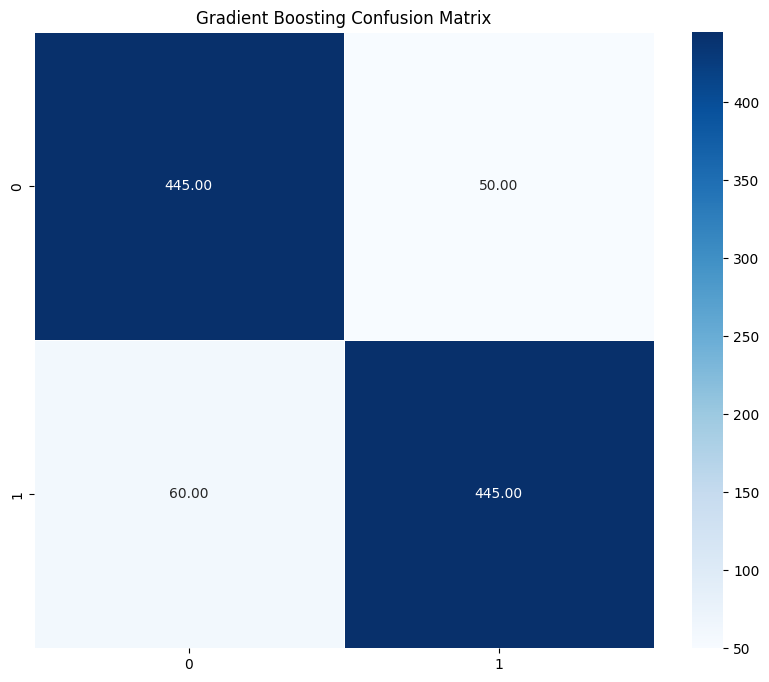

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Gradient Boosting Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, gradient_boosting_predictions), annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.show()

## Save model

In [ ]:
import pickle
# with open('apple_rf.pkl', 'wb') as f:
#     pickle.dump(random_forest_grid_result, f)

# with open('apple_gb.pkl', 'wb') as f:
#     pickle.dump(gradient_boosting_grid_result, f)

In [ ]:
with open('apple_rf.pkl', 'rb') as f:
    model1 = pickle.load(f)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

load_predictions = model1.predict(X_test)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, load_predictions))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, load_predictions))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       495
           1       0.89      0.87      0.88       505

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000


Random Forest Confusion Matrix:
 [[439  56]
 [ 64 441]]


In [ ]:
with open('apple_gb.pkl', 'rb') as f:
    model2 = pickle.load(f)

In [ ]:
load_predictions = model2.predict(X_test)
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, load_predictions))
print("\nGradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, load_predictions))


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       495
           1       0.89      0.87      0.88       505

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000


Gradient Boosting Confusion Matrix:
 [[443  52]
 [ 66 439]]


# Application

In [ ]:
with open('apple_rf.pkl', 'rb') as f:
    model1 = pickle.load(f)

with open('apple_gb.pkl', 'rb') as f:
    model2 = pickle.load(f)

In [ ]:
X_test

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
555,1.919,-0.461,-1.702,-0.015,0.011,0.633,-0.297
3491,1.035,0.517,0.226,0.328,0.198,-1.479,0.914
527,0.911,0.327,1.183,0.242,-0.578,-1.007,0.457
3925,-0.591,-0.370,1.457,-0.869,-1.052,1.032,-0.269
2989,-0.778,0.328,-1.014,-0.646,-1.775,0.613,-0.827
...,...,...,...,...,...,...,...
2778,1.347,0.523,0.300,0.630,-1.009,-0.626,0.826
790,-0.076,-1.043,-0.602,-0.501,1.273,0.748,2.066
1334,0.136,0.742,-0.330,-0.960,1.083,-1.064,0.664
678,0.228,1.788,-1.430,0.694,-0.271,0.732,-1.280


In [ ]:
import numpy as np

def evaluate_prediction(model, fruit_df):
  """
  Evaluates the prediction made by the model on the given DataFrame.

  Args:
      model1: The machine learning model to use for prediction.
      fruit_df: A DataFrame containing the fruit data to predict on.

  Returns:
      A string indicating whether the prediction is "good" or "bad"
          based on the predicted class label.
  """

  load_predictions = model1.predict(fruit_df)

  if isinstance(load_predictions, np.ndarray):
    # Check if it's a 1D or 2D array (handle both cases)
    if len(load_predictions.shape) == 1:
      predicted_class = load_predictions[0]  # Access first element
    else:
      predicted_class = load_predictions[0][0]  # Access first element from first sub-array

    # Interpret class labels (assuming 0 is bad and 1 is good)
    if predicted_class == 0:
      print("Prediction output is bad (class 0)")
    elif predicted_class == 1:
      print("Prediction output is good (class 1)")
    else:
      print("Unexpected prediction class:", predicted_class)
  else:
    print("Unexpected prediction output type:", type(load_predictions))

  return "Good" if predicted_class == 1 else "Bad"  # Optional return value

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

size = input("Enter a size: ")
weight = input("Enter a Weight: ")
sweetness = input("Enter a Sweetness: ")
crunchiness = input("Enter a Crunchiness: ")
juiciness = input("Enter a Juiciness: ")
ripeness = input("Enter a Ripeness: ")
acidity = input("Enter Acidity: ")

# Create a dictionary with user input
fruit_data = {
    "Size": size,
    "Weight": weight,
    "Sweetness": sweetness,
    "Crunchiness": crunchiness,
    "Juiciness": juiciness,
    "Ripeness": ripeness,
    "Acidity": acidity
}

# Create a DataFrame from the dictionary
fruit_df = pd.DataFrame(fruit_data, index=[0])  # Include index=[0] for single row

# Print the DataFrame
# print(fruit_df)

# Assuming you have your model1 and fruit_df defined
prediction_result = evaluate_prediction(model1, fruit_df)
prediction_result2 = evaluate_prediction(model2, fruit_df)

print("Prediction result1:", prediction_result)
print("Prediction result2:", prediction_result)

Enter a size: 1
Enter a Weight: 1
Enter a Sweetness: 1
Enter a Crunchiness: 1
Enter a Juiciness: 1
Enter a Ripeness: 1
Enter Acidity: 1
Prediction output is good (class 1)
Prediction output is good (class 1)
Prediction result1: Good
Prediction result2: Good
